# Fruits and Vegetables Image Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os   # Dosya islemleri
import warnings  

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg

2025-09-26 18:34:03.949114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758911644.289368      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758911644.385207      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings("ignore")      # Uyarı satırlarını gosterme  

#### Dataset halihazırda test,train ve validation olarak ayrıldığı için train_test_split kullanılmadı.
#### Her bir resmin boyutu (128,128) olacak şekilde ayarlandı.
### Data Augmentation ( Veri Çoğaltma):
#### Mevcut eğitim görselleri üzerinde rastgele küçük değişiklikler yaparak modelin ezber yapmasını engeller ve yeni, daha önce görmediği görüntülere karşı direncini artırır.

In [5]:
train_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
val_dir   = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"
test_dir  = "/kaggle/input/fruit-and-vegetable-image-recognition/test"

# Data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Görüntüleri normalleştirme (Zaten vardı)
    rotation_range=20,       # %20'ye kadar rastgele döndürme
    width_shift_range=0.1,   # %10 yatay kaydırma
    height_shift_range=0.1,  # %10 dikey kaydırma
    shear_range=0.1,         # Makaslama (Eğme)
    zoom_range=0.1,          # %10 yakınlaştırma
    horizontal_flip=True,    # Rastgele yatay çevirme
    fill_mode='nearest'      # Doldurma modu
)

validation_datagen = ImageDataGenerator(rescale=1./255) 

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred', 
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    image_size=(128,128),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    image_size=(128,128),
    batch_size=32
)

class_names = train_ds.class_names
print("Class Names:")
print(class_names)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Class Names:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


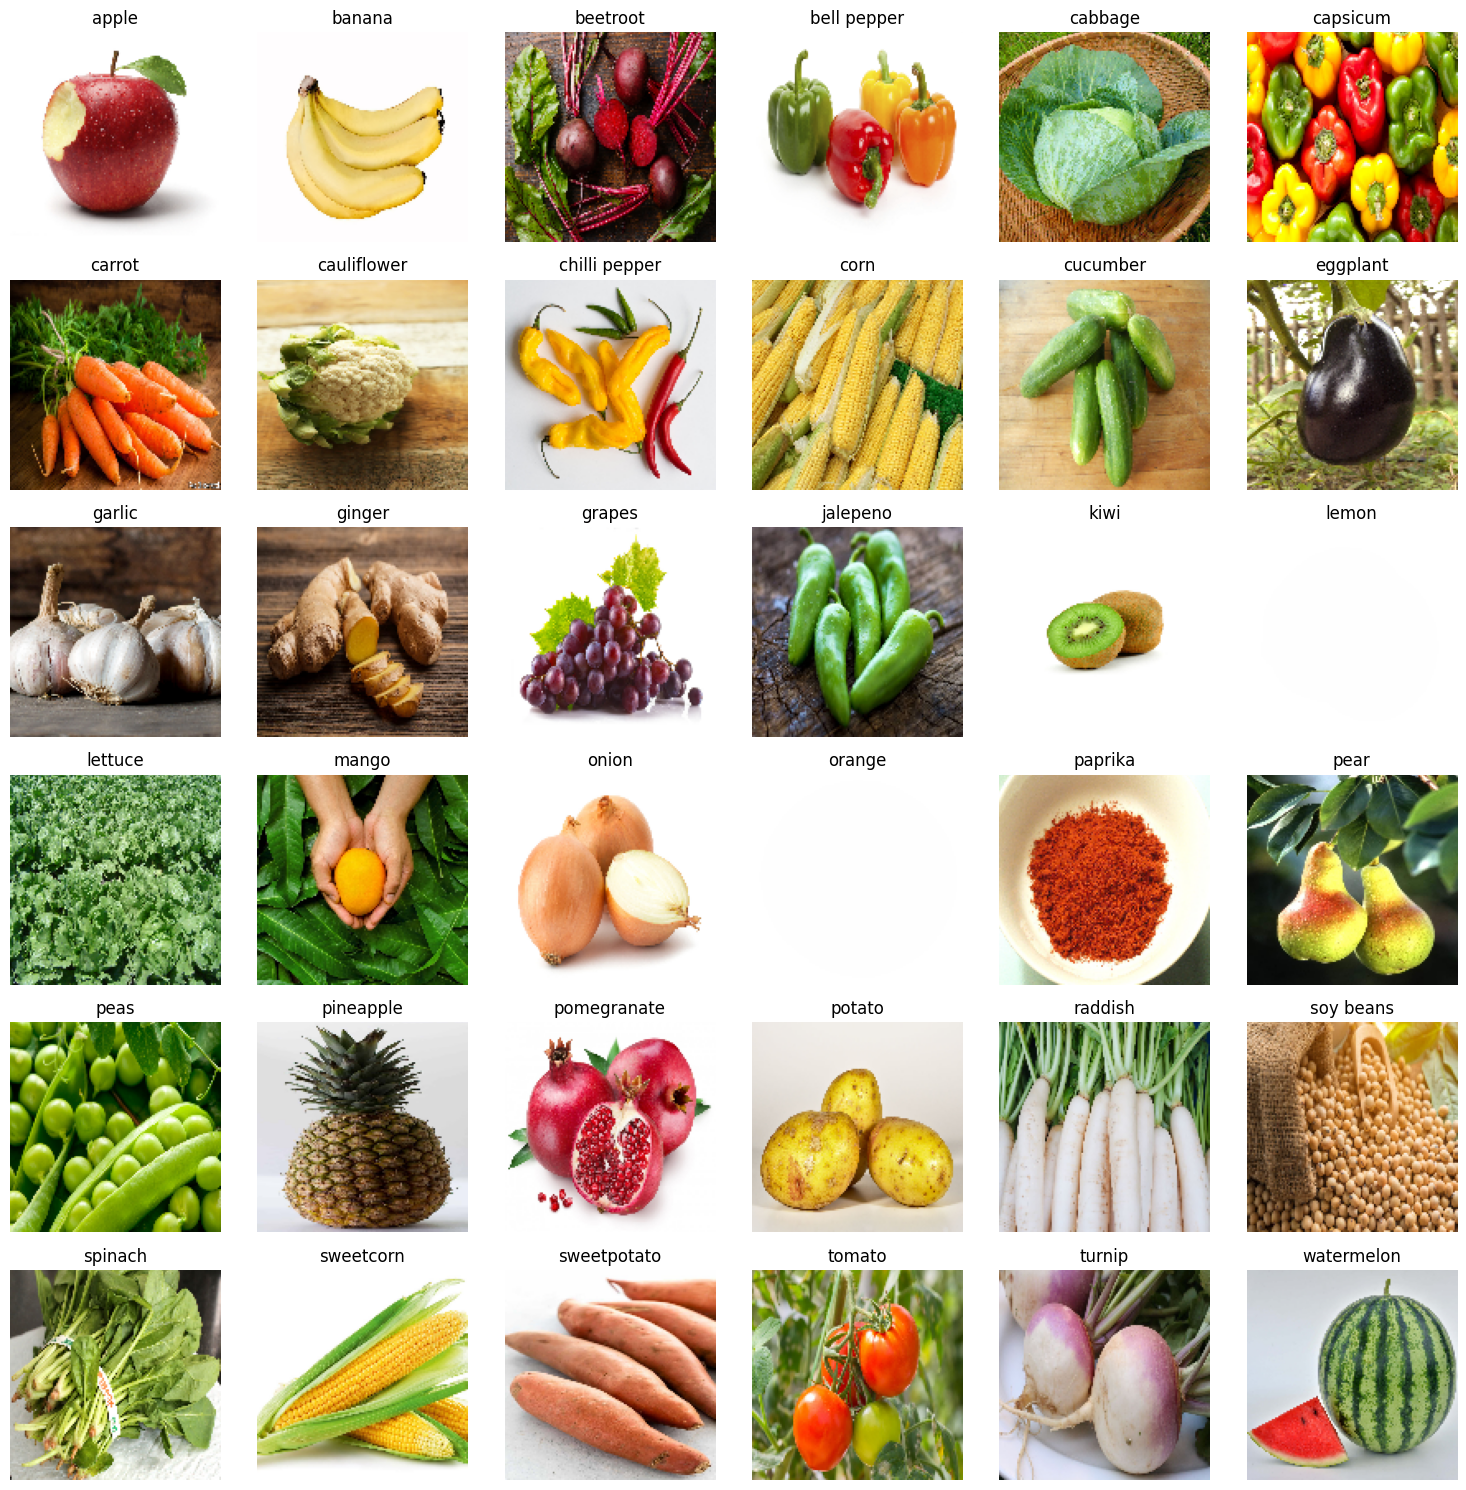

In [6]:
folders = sorted(os.listdir(train_dir)) # Dosyaları alfabetik sırala

num_classes = len(folders) # Kaç sınıf var

plt.figure(figsize=(15, 15))

for i, folder in enumerate(folders):
    folder_path = os.path.join(train_dir, folder)
    
    if os.path.isdir(folder_path):
        # Dosyaları sırala
        file_list = sorted(os.listdir(folder_path))
        
        if len(file_list) > 0:
            file_name = file_list[0] # İlk dosya
            img_path = os.path.join(folder_path, file_name)
            
            # Resmi oku
            img = mpimg.imread(img_path)
            img = tf.image.resize(img, (128,128)).numpy().astype("uint8")
            
        
            plt.subplot(6, 6, i+1)
            plt.imshow(img)
            plt.title(folder)
            plt.axis("off")

plt.tight_layout()
plt.show()


#### Datasette hatalı etiketlenmiş veri olup olmadığını kontrol edebilmek için random kütüphanesi yardımı ile rastgele fotoğraflar basıyoruz. Hatalı veri görünmüyor.

In [7]:
import random

In [ ]:
all_images = []
all_labels = []

# Tüm datasetten bütün resimleri ve etiketlerini topla
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        files = sorted(os.listdir(folder_path))
        for file in files:
            file_path = os.path.join(folder_path, file)
            try:
                img = mpimg.imread(file_path)
                img = tf.image.resize(img, (128,128)).numpy().astype("uint8")
                all_images.append(img)
                all_labels.append(folder)
            except:
                continue

randoms = random.sample(range(len(all_images)), 25)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(randoms):
    plt.subplot(5, 5, i+1)
    plt.imshow(all_images[idx])
    plt.title(all_labels[idx])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
class_counts = {}

for folder in sorted(os.listdir(train_dir)):
    if os.path.isdir(folder_path):
        class_counts[folder] = len(os.listdir(folder_path))

# Tabloya çevir
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image_Count"])

plt.figure(figsize=(12,6))
plt.bar(df_counts["Class"], df_counts["Image_Count"])
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.show()

#### Yukarıdaki grafiğe bakarak train dosyasındaki her bir sınıfın eşit sayıda veriye sahip olduğunu görebiliriz. Bundan yola çıkarak verisetinin düzenli olduğu yorumunu yapabiliriz.

## MODEL EĞİTİMİ

In [10]:
from tensorflow.keras import layers, models

In [11]:
def cnn(optimizer="adam", filters=32, kernel_size=3, dropout_rate=0.5):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(128,128,3)), 
        
        layers.Conv2D(filters, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(filters*2, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(filters*4, (kernel_size, kernel_size), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Dropout(0.25), 
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model


#### Projede 36 sınıfı ayırt etmek için basit ve etkili bir Evrişimsel Sinir Ağı (CNN) kullanılmıştır. 
#### Model, üç ardışık Evrişim (Conv2D) ve Pooling (MaxPooling2D) bloğundan oluşur. 
### Overfitting (Aşırı Öğrenme):
#### Modelin eğitim verilerini ezberlemesini önlemek için iki  Dropout katmanı eklenmiştir.

In [12]:
model = cnn()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,525,284 (24.89 MB)

 Trainable params: 6,525,284 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds
)


Epoch 1/30


I0000 00:00:1758911981.163709     104 service.cc:148] XLA service 0x7f9e4403a170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758911981.165327     104 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758911981.165350     104 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758911981.883479     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


 4/98 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0182 - loss: 3.6027     

I0000 00:00:1758911986.471934     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 311ms/step - accuracy: 0.0500 - loss: 3.4903 - val_accuracy: 0.2165 - val_loss: 2.8715
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.1378 - loss: 3.0094 - val_accuracy: 0.4046 - val_loss: 2.1408
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.2333 - loss: 2.6157 - val_accuracy: 0.4900 - val_loss: 1.9535
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.2893 - loss: 2.3774 - val_accuracy: 0.5527 - val_loss: 1.5811
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.3159 - loss: 2.2006 - val_accuracy: 0.5840 - val_loss: 1.4669
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.3734 - loss: 2.0560 - val_accuracy: 0.6439 - val_loss: 1.1935
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.4444 - loss: 1.8381 - val_accuracy: 0.7350 - val_loss: 0.9062
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.5122 - loss: 1.6532 - val_accuracy: 0.843

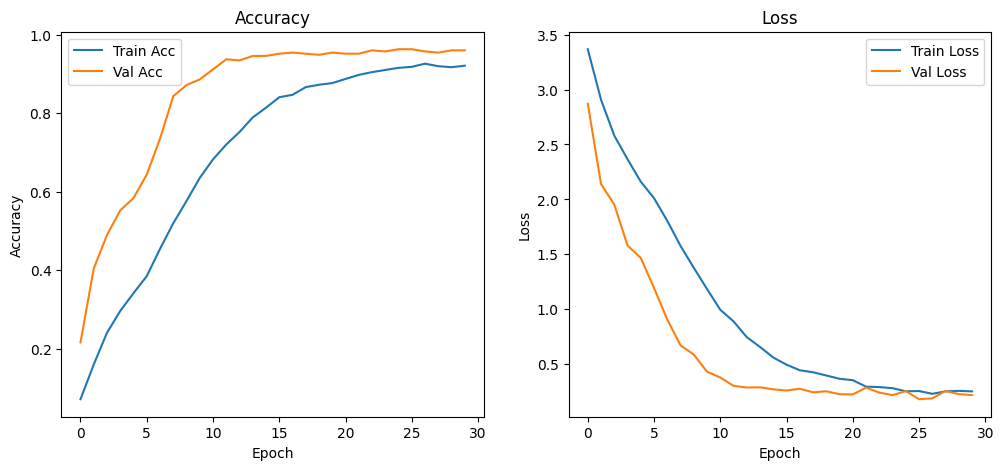

In [14]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


### Eğitim Doğruluğu:
#### Eğitim verisindeki doğruluk değerinin yüksek bir noktada (%96) neredeyse sabitlenmesi modelin iyi öğrendiğini gösterir.
### Validation Doğruluğu:
#### Eğrinin %92'lik bir değere ulaşması ve train eğrisi ile yakın seyretmesi modelin overfitting yapmadığını gösterir.

In [18]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9489 - loss: 0.2801
Test Loss: 0.2132
Test Accuracy: 0.9610


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


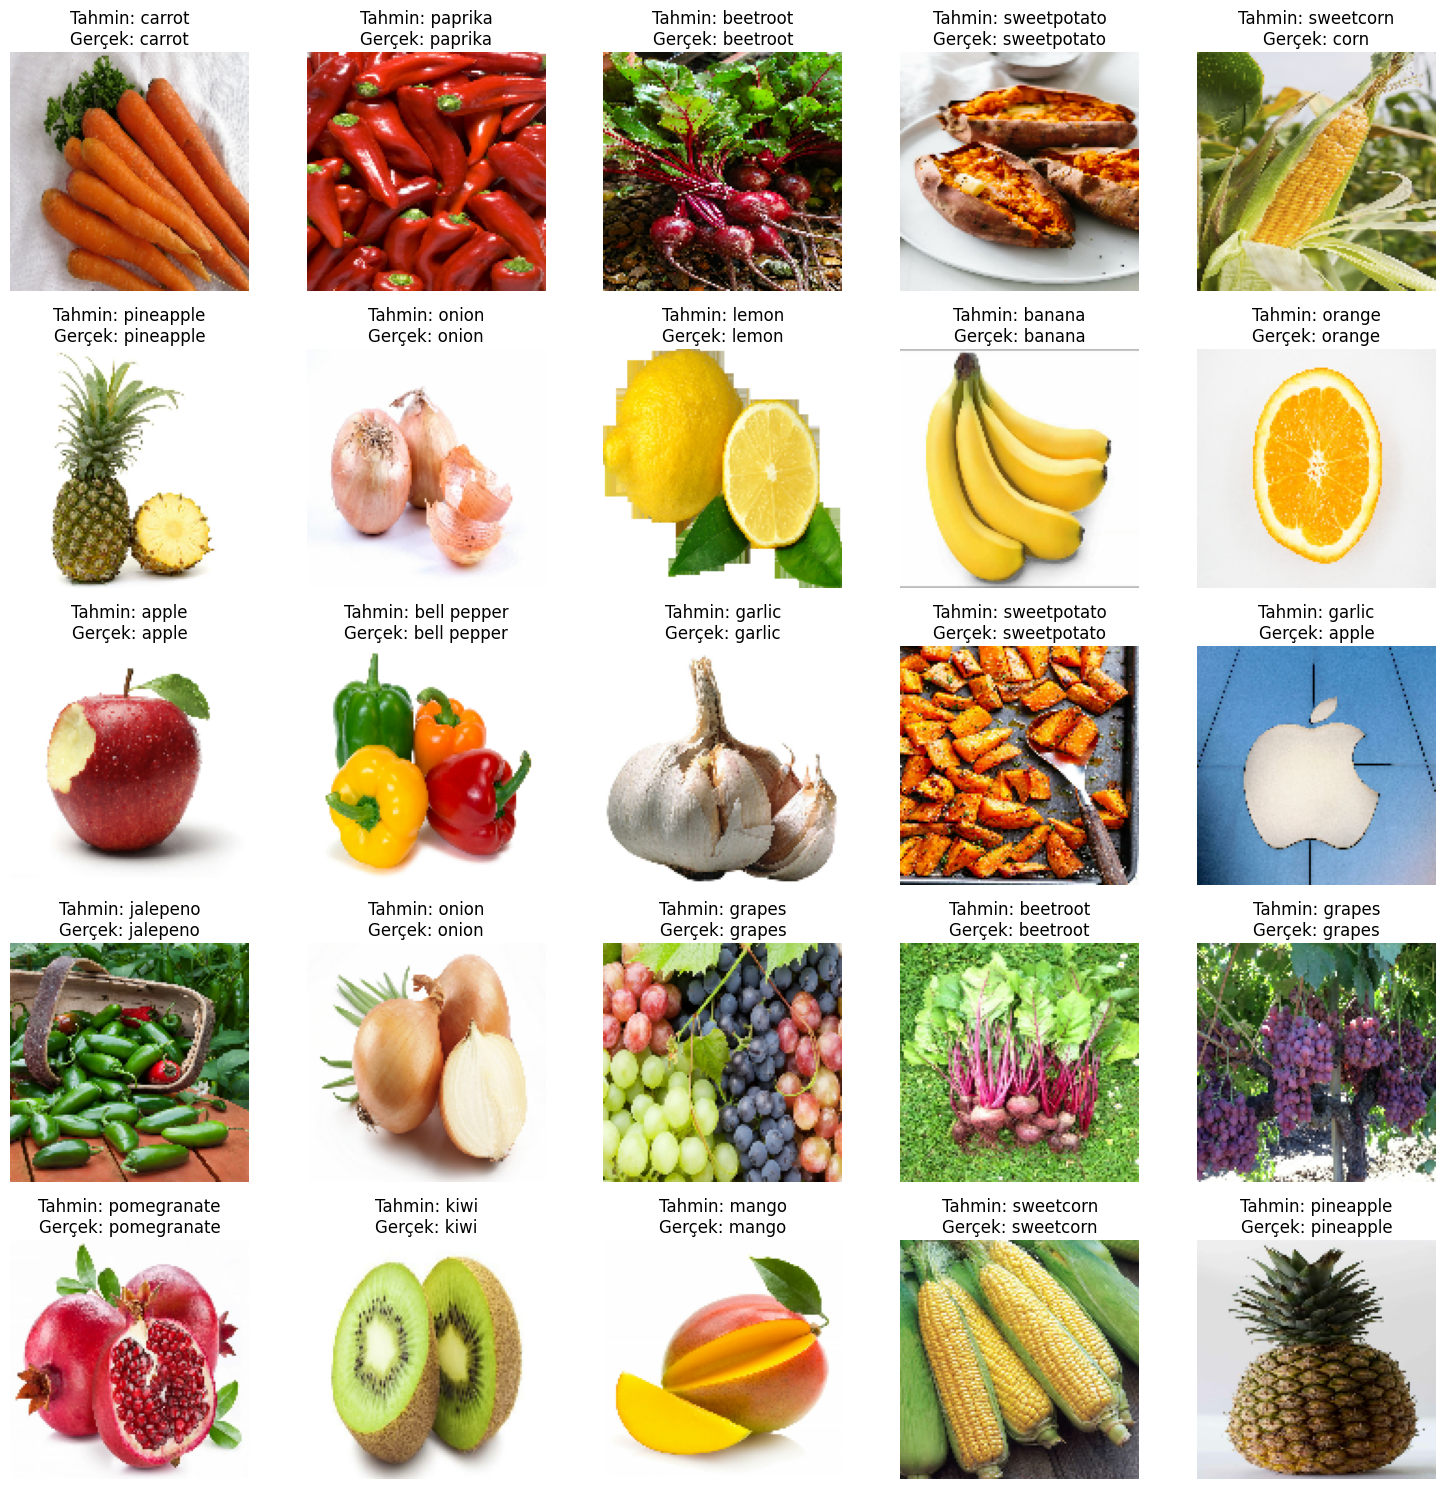

In [16]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=1)
    true_labels = tf.argmax(labels, axis=1)

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Tahmin: {class_names[preds[i]]}\nGerçek: {class_names[true_labels[i]]}")
        plt.axis("off")
plt.tight_layout()
plt.show()


<Figure size 4000x4000 with 0 Axes>

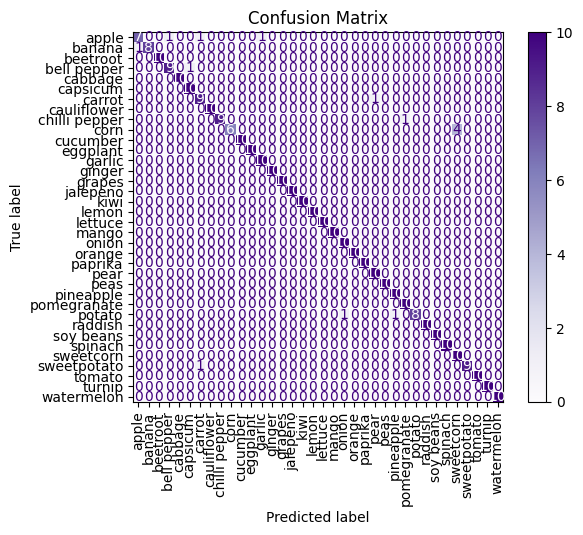

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test verisinden resimler ve etiketler al
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(40, 40))
disp.plot(cmap="Purples", xticks_rotation=90, values_format='d')
plt.title("Confusion Matrix")
plt.show()
